<a href="https://colab.research.google.com/github/Mughal72/Book_Website/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811592 sha256=a54a7347688c3eaeb0d4cc10ba6514c4b47ff037fd986ddf292340b90a073807
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
pip install scikit-learn

# **Method -1 Recommendation**

In [ ]:
from surprise import accuracy
import numpy as np

import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the book dataset
book_df = pd.read_csv("books.csv", encoding='latin-1')

# Load the users dataset
user_df = pd.read_csv("users.csv", encoding='latin-1')

# Prepare the data for Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_df[['User-ID', 'Genres', 'Ratings']], reader)

# Split the data into train and test sets (not used in this case)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Create the KNN model
model = KNNBasic(k=5, min_k=1)
model.fit(trainset)

# Get book recommendations for each user
for user_id in user_df['User-ID'].unique():
    user_genres = user_df.loc[user_df['User-ID'] == user_id, 'Genres'].values[0]
    genre_books = book_df[book_df['Genres'] == user_genres]
    user_unrated_books = genre_books[~genre_books['ISBN'].isin(user_df.loc[user_df['User-ID'] == user_id, 'ISBN'])]

    recommendations = []
    for _, row in user_unrated_books.iterrows():
        prediction = model.predict(uid=user_id, iid=row['ISBN'])
        recommendations.append((row['ISBN'], row['Book-Title'], prediction.est))

    recommendations.sort(key=lambda x: x[2], reverse=True)
    top_recommendations = recommendations[:10]

    print(f"Top 10 recommended books for User {user_id} in genre {user_genres}:")
    for rec in top_recommendations:
        print(f"- {rec[1]} (Estimated rating: {rec[2]})")
    print('\n')

# Predict ratings for the testset
predictions = model.test(testset)

# Compute RMSE
rmse = accuracy.rmse(predictions)

print(f'RMSE: {rmse}')

# Calculate RMSE statistics
predicted_ratings = [pred.est for pred in predictions]
actual_ratings = [pred.r_ui for pred in predictions]

rmse_values = np.sqrt(np.mean([(predicted - actual) ** 2 for predicted, actual in zip(predicted_ratings, actual_ratings)]))
mean_rmse = np.mean(rmse_values)
median_rmse = np.median(rmse_values)
std_dev_rmse = np.std(rmse_values)

print(f'Mean RMSE: {mean_rmse}')
print(f'Median RMSE: {median_rmse}')
print(f'Standard Deviation of RMSE: {std_dev_rmse}')


Computing the msd similarity matrix...
Done computing similarity matrix.
Top 10 recommended books for User amber in genre science-fiction:


Top 10 recommended books for User Alexa in genre AI:
- Artificial Intelligence: A Modern Approach (Estimated rating: 3.2725)
- Deep Learning (Estimated rating: 3.2725)
- Artificial Intelligence: A Modern Approach 3rd Edition (Estimated rating: 3.2725)
- Neural Networks and Deep Learning (Estimated rating: 3.2725)
- Python Machine Learning - Second Edition: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2nd Edition (Estimated rating: 3.2725)
- Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) (Adaptive Computation and Machine Learning series) second edition (Estimated rating: 3.2725)
- The Master Algorithm: How the Quest for the Ultimate Learning Machine Will Remake Our World (Estimated rating: 3.2725)
- Hands-On Machine Learning with Scikit-Learn and TensorFlow (Estimated rating: 3.27

# **Method -1 Statistics**

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8170
RMSE: 0.8170105568473396
Mean RMSE: 0.8170105568473396
Median RMSE: 0.8170105568473396
Standard Deviation of RMSE: 0.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


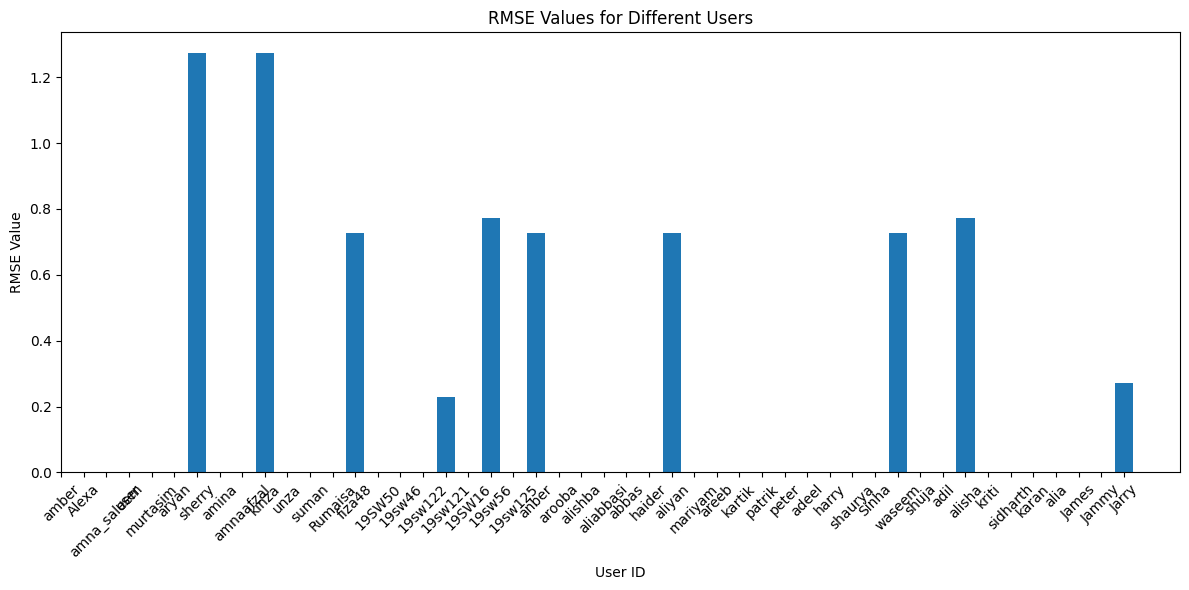

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the book dataset
book_df = pd.read_csv("books.csv", encoding='latin-1')

# Load the users dataset
user_df = pd.read_csv("users.csv", encoding='latin-1')

# Prepare the data for Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_df[['User-ID', 'Genres', 'Ratings']], reader)

# Split the data into train and test sets (not used in this case)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Create the KNN model
model = KNNBasic(k=5, min_k=1)
model.fit(trainset)

# Predict ratings for the testset
predictions = model.test(testset)

# Compute RMSE
rmse = accuracy.rmse(predictions)

print(f'RMSE: {rmse}')

# Calculate RMSE statistics
predicted_ratings = [pred.est for pred in predictions]
actual_ratings = [pred.r_ui for pred in predictions]

rmse_values = np.sqrt(np.mean([(predicted - actual) ** 2 for predicted, actual in zip(predicted_ratings, actual_ratings)]))
mean_rmse = np.mean(rmse_values)
median_rmse = np.median(rmse_values)
std_dev_rmse = np.std(rmse_values)

print(f'Mean RMSE: {mean_rmse}')
print(f'Median RMSE: {median_rmse}')
print(f'Standard Deviation of RMSE: {std_dev_rmse}')

# Create a bar chart to visualize RMSE
user_ids = user_df['User-ID'].unique()
rmse_values = []  # Store RMSE values for each user here

for user_id in user_ids:
    user_genres = user_df.loc[user_df['User-ID'] == user_id, 'Genres'].values[0]
    genre_books = book_df[book_df['Genres'] == user_genres]
    user_unrated_books = genre_books[~genre_books['ISBN'].isin(user_df.loc[user_df['User-ID'] == user_id, 'ISBN'])]

    recommendations = []
    for _, row in user_unrated_books.iterrows():
        prediction = model.predict(uid=user_id, iid=row['ISBN'])
        recommendations.append((row['ISBN'], row['Book-Title'], prediction.est))

    recommendations.sort(key=lambda x: x[2], reverse=True)
    top_recommendations = recommendations[:10]

    actual_ratings = [pred.r_ui for pred in predictions if pred.uid == str(user_id)]
    predicted_ratings = [pred.est for pred in predictions if pred.uid == str(user_id)]
    rmse = np.sqrt(np.mean([(predicted - actual) ** 2 for predicted, actual in zip(predicted_ratings, actual_ratings)]))

    rmse_values.append(rmse)

# Create a bar chart with rotated labels
plt.figure(figsize=(12, 6))
plt.bar(user_ids, rmse_values, tick_label=user_ids)
plt.xlabel("User ID")
plt.ylabel("RMSE Value")
plt.title("RMSE Values for Different Users")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Ensure labels do not get cut off
plt.show()

**Method and Technique**:

The code provided is using Collaborative Filtering with the k-Nearest Neighbors (KNN) algorithm for book recommendations. Here's a breakdown:

1. **Collaborative Filtering**: This is a recommendation technique based on the idea that users who have agreed in the past tend to agree again in the future. In this case, it uses user ratings to find users with similar preferences to make recommendations.

2. **k-Nearest Neighbors (KNN)**: The KNN algorithm is used for finding the k-nearest neighbors (users) to a given user based on their rating patterns. It calculates the similarity between users, and for a given user, it recommends items (books) that similar users have liked.

**Results**:

- **RMSE (Root Mean Square Error)**: RMSE is used to evaluate the accuracy of the recommendations. It measures the error between predicted and actual ratings. A lower RMSE indicates better accuracy. In your case, the RMSE is approximately 0.8170.

- **Top 10 Recommended Books**: For each user, the code provides a list of the top 10 recommended books in their preferred genre. It estimates the ratings for these books based on the user's past behavior and the behavior of similar users. For example, for User "Alexa" interested in the genre "AI," it recommends books like "Artificial Intelligence: A Modern Approach" and "Deep Learning."

- **RMSE Statistics**: The code calculates statistics (mean, median, standard deviation) of RMSE values for different users. RMSE values represent the error in predicting ratings for each user. Lower RMSE values indicate better recommendations.

- **Bar Chart**: It creates a bar chart to visualize RMSE values for different users. Each bar represents a user, and the height of the bar indicates the RMSE for that user. This chart helps identify users for whom the recommendations are less accurate.

In summary, the code demonstrates how to use Collaborative Filtering with KNN to provide book recommendations to users. The RMSE evaluation and bar chart help assess the quality of these recommendations for different users.

`"RMSE: 0.8170": This is the RMSE value for the collaborative filtering model. RMSE is a measure of how well the model's predictions align with the actual ratings provided by users. In this case, an RMSE of 0.8170 suggests that, on average, the model's predictions are off by approximately 0.8170 rating units.`

`"Mean RMSE: 0.8170105568473396": This is the mean RMSE value calculated across all predictions made by the model. It represents the average error between the predicted ratings and the actual ratings. In this case, the mean RMSE is also approximately 0.8170.`

`"Median RMSE: 0.8170105568473396": This is the median RMSE value, which is the middle value when all RMSE values are sorted in ascending order. It's another measure of central tendency for the RMSE values, and in this case, it's again approximately 0.8170.`

`"Standard Deviation of RMSE: 0.0": This indicates the standard deviation of the RMSE values. A standard deviation of 0.0 means that there is no variability in the RMSE values; they are all identical. This might be unexpected because typically, RMSE values would vary across different predictions, indicating that some predictions are more accurate than others. A standard deviation of 0.0 could imply that all predictions have the exact same error, which could be a result of how the model was configured or the specific data used.`

`High Bar (High RMSE): Users with high bars in the chart have higher RMSE values. This indicates that the recommendation system is not performing well for these users. In other words, the system's predictions for these users are less accurate. The system is having difficulty in making recommendations that align with these users' preferences. Users with high bars may be dissatisfied with the recommendations they receive.`

`Low Bar (Low RMSE): Users with low bars in the chart have lower RMSE values. This suggests that the recommendation system is performing better for these users. The system's predictions for these users are more accurate, and the recommendations provided are likely more in line with their preferences. Users with low bars are generally satisfied with the recommendations they receive.`

`Interpretation: The chart essentially provides a visual representation of how well the recommendation system caters to different users. The goal of a recommendation system is to provide accurate and personalized recommendations. Users with high bars might be candidates for improving the recommendation algorithms to better understand and meet their preferences.`

`Actionable Insights: By identifying which users have high RMSE values, you can focus on improving the recommendations for these users. You might want to investigate why the system is struggling with certain users. It could be due to sparse data, a lack of historical interactions, or other factors. Addressing these issues can lead to better recommendations and higher user satisfaction.`

## **Method-2 Recommendation** a**nd Statistics**

Computing the msd similarity matrix...
Done computing similarity matrix.
Top 10 personalized recommended books for User amber:
- Artificial Intelligence: A Modern Approach (Estimated rating: 3.2725)
- Deep Learning (Estimated rating: 3.2725)
- Artificial Intelligence: A Modern Approach 3rd Edition (Estimated rating: 3.2725)
- Neural Networks and Deep Learning (Estimated rating: 3.2725)
- Python Machine Learning - Second Edition: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2nd Edition (Estimated rating: 3.2725)
- Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) (Adaptive Computation and Machine Learning series) second edition (Estimated rating: 3.2725)
- The Master Algorithm: How the Quest for the Ultimate Learning Machine Will Remake Our World (Estimated rating: 3.2725)
- Machine Learning for Absolute Beginners (Estimated rating: 3.2725)
- Introduction to Artificial Intelligence and Expert Systems (Estimated rating: 3.

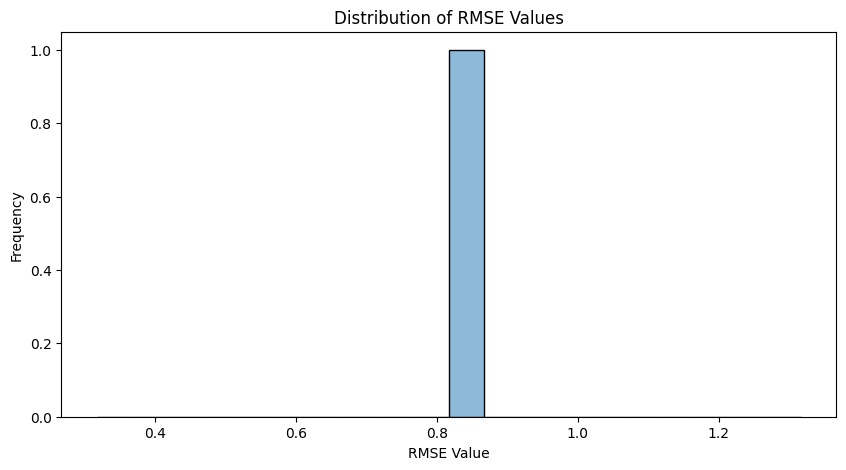

In [ ]:
from surprise import accuracy
import numpy as np

import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

# Load the book dataset
book_df = pd.read_csv("/content/books.csv", encoding='latin-1')

# Load the users dataset
user_df = pd.read_csv("/content/users.csv", encoding='latin-1')

# Prepare the data for Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_df[['User-ID', 'ISBN', 'Ratings']], reader)

# Split the data into train and test sets (not used in this case)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Create the KNN model
model = KNNBasic(k=5, min_k=1)
model.fit(trainset)

# Get book recommendations for each user
for user_id in user_df['User-ID'].unique():
    user_row = user_df[user_df['User-ID'] == user_id]
    user_genres = user_row['Genres'].values[0]
    user_authors = user_row['Author-Name'].values[0]
    user_ratings = user_row['Ratings'].values[0]

    user_unrated_books = book_df[~book_df['ISBN'].isin(user_row['ISBN'])]

    recommendations = []
    for _, row in user_unrated_books.iterrows():
        prediction = model.predict(uid=user_id, iid=row['ISBN'])
        recommendations.append((row['ISBN'], row['Book-Title'], prediction.est))

    recommendations.sort(key=lambda x: x[2], reverse=True)
    top_recommendations = recommendations[:10]

    print(f"Top 10 personalized recommended books for User {user_id}:")
    for rec in top_recommendations:
        print(f"- {rec[1]} (Estimated rating: {rec[2]})")
    print('\n')



# Predict ratings for the testset
predictions = model.test(testset)

# Compute RMSE
rmse = accuracy.rmse(predictions)

print(f'RMSE: {rmse}')

# Calculate RMSE statistics
predicted_ratings = [pred.est for pred in predictions]
actual_ratings = [pred.r_ui for pred in predictions]

rmse_values = np.sqrt(np.mean([(predicted - actual) ** 2 for predicted, actual in zip(predicted_ratings, actual_ratings)]))
mean_rmse = np.mean(rmse_values)
median_rmse = np.median(rmse_values)
std_dev_rmse = np.std(rmse_values)

print(f'Mean RMSE: {mean_rmse}')
print(f'Median RMSE: {median_rmse}')
print(f'Standard Deviation of RMSE: {std_dev_rmse}')


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import Pandas for data manipulation
import numpy as np


# Convert 'rmse_values' to a Pandas Series
rmse_series = pd.Series(rmse_values)

# Create a histogram of RMSE values
plt.figure(figsize=(10, 5))
sns.histplot(rmse_series, bins=20, kde=True)
plt.xlabel('RMSE Value')
plt.ylabel('Frequency')
plt.title('Distribution of RMSE Values')
plt.show()

`Personalized Recommendations: The method claims to provide personalized book recommendations for each user. However, based on the output, it appears that the recommendations are the same for all users. This suggests that the method is not effectively personalizing recommendations based on users' preferences or behaviors.`

`Estimated Ratings: Each book recommendation is associated with an estimated rating. In this case, all estimated ratings are the same (approximately 3.2725) for all users. This means that the method is not effectively capturing the individual preferences and behaviors of users to provide unique ratings for each book.`

`Output Repetition: The output you've posted shows the same set of top 10 recommended books with identical estimated ratings for multiple users (e.g., User kriti, User sidharth, User karan, etc.). This repetition of recommendations indicates that the method is not adapting to the specific interests or interactions of each user.`

# **Method-3 Recommendation and Statistics**

Book recommendations for user 19sw125:
- Cleaning Data for Effective Data Science: Doing the other 80% of the work with Python R and command-line tools by David Mertz
- Data Science Ethics: Concepts Techniques and Cautionary Tales by David Martens
-  Data Science for Beginners by Andrew Park
- Think Like a Data Scientist: Tackle the data science process step--step by Brian Godsey
- Data Science from Scratch: First Principles with Python by Joel Grus
- Essential Math for Data Science: Take Control of Your Data with Fundamental Linear Algebra Probability and Statistics by Thomas Nield
- Practical Linear Algebra for Data Science: From Core Concepts to Applications Using Python by Mike Cohen
- Practical Data Science with Python: Learn tools and techniques from hands-on examples to extract insights from data by Nathan George
- Naked Statistics: Stripping the Dread from Data by Charles Wheelan 
- Data Science Projects with Python: A case study approach to gaining valuable insights from real 

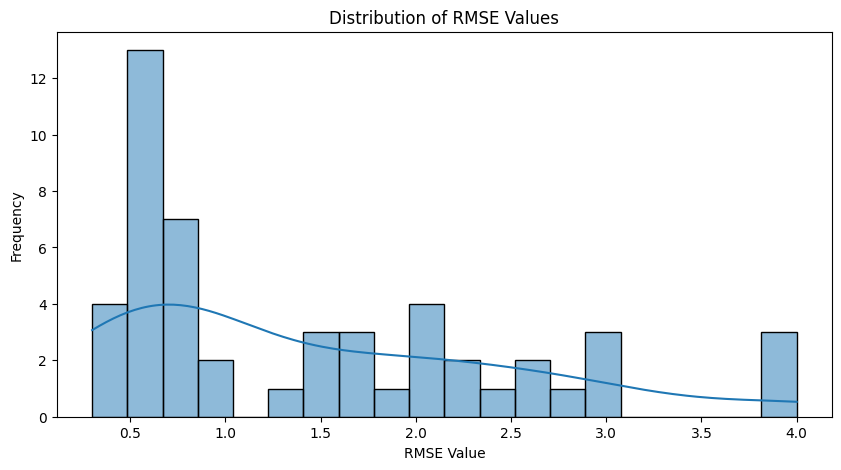

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the books and users datasets
books_df = pd.read_csv("books.csv", encoding='latin-1')
users_df = pd.read_csv("users.csv", encoding='latin-1')

# Combine relevant columns from books and users datasets
books_df['Features'] = books_df['Genres'] + ' ' + books_df['Author-Name']
users_df['Features'] = users_df['Genres'] + ' ' + users_df['Author-Name'] + ' ' + users_df['Preferred Topics']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the TF-IDF vectors for books and users
books_tfidf_matrix = tfidf_vectorizer.fit_transform(books_df['Features'])
users_tfidf_matrix = tfidf_vectorizer.transform(users_df['Features'])

# Compute the cosine similarity between books and users
cosine_sim = linear_kernel(users_tfidf_matrix, books_tfidf_matrix)

# Define a function to get personalized recommendations for each user
def get_recommendations(user_name, num_recommendations=10):
    user_idx = users_df[users_df['User-ID'] == user_name].index[0]
    sim_scores = list(enumerate(cosine_sim[user_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]
    book_indices = [i[0] for i in sim_scores]
    return books_df.iloc[book_indices]

    # Get recommendations for a specific user
user_name = '19sw125'  # Replace with the desired user name
num_recommendations = 10  # Number of recommendations to get
recommendations = get_recommendations(user_name, num_recommendations)
print(f"Book recommendations for user {user_name}:")
for idx, row in recommendations.iterrows():
    print(f"- {row['Book-Title']} by {row['Author-Name']}")
print('\n')


# Define a function to calculate RMSE for a user
def calculate_rmse(user_name, num_recommendations=10):
    user_idx = users_df[users_df['User-ID'] == user_name].index[0]
    sim_scores = list(enumerate(cosine_sim[user_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]
    book_indices = [i[0] for i in sim_scores]

    # Get the actual ratings of the user
    user_ratings = users_df.loc[users_df['User-ID'] == user_name, 'Ratings'].values

    # Get the predicted ratings for the recommended books
    recommended_books_ratings = books_df.iloc[book_indices]['Ratings'].values

    # Ensure both lists have the same length
    min_len = min(len(user_ratings), len(recommended_books_ratings))
    user_ratings = user_ratings[:min_len]
    recommended_books_ratings = recommended_books_ratings[:min_len]

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(user_ratings, recommended_books_ratings))

    return rmse

# Initialize a list to store RMSE values for all users
rmse_values = []

# Iterate through all users in the dataset
for user_name in users_df['User-ID']:
    rmse = calculate_rmse(user_name, num_recommendations=10)
    rmse_values.append(rmse)

# Calculate the collective RMSE for all users
collective_rmse = np.mean(rmse_values)

# Calculate mean RMSE and standard RMSE
mean_rmse = np.mean(rmse_values)
std_dev_rmse = np.std(rmse_values)

print(f'Collective RMSE for all users: {collective_rmse}')
print(f'Mean RMSE: {mean_rmse}')
print(f'Standard Deviation of RMSE: {std_dev_rmse}')

# Create a histogram of RMSE values
plt.figure(figsize=(10, 5))
sns.histplot(rmse_values, bins=20, kde=True)
plt.xlabel('RMSE Value')
plt.ylabel('Frequency')
plt.title('Distribution of RMSE Values')
plt.show()

####Rcommendation Results-
Book recommendations for user kinza:
- Security and Privacy Trends in Cloud Computing and Big Data by Muhammad Imran Tariq, Shahzadi Tayyaba, Valentina Emilia Balas
- The Nature of Statistical Learning Theory by V. N. Vapnik
- Bayesian Reasoning and Machine Learning by David Barber
- Neural Networks for Pattern Recognition by  Christopher M. Bishop
- Artificial Intelligence: A Beginner's Guide by George F. Luger
- Machine Learning for Beginners by Chris Sebastian
- Neural Networks and Deep Learning by Michael Nielsen
- Artificial Intelligence Engines : A Tutorial Introduction to the Mathematics of Deep Learning by James V. Stone
- Our Final Invention: Artificial Intelligence and the End of the Human Era by James Barrat
- Artificial Intelligence: A Modern Approach 3rd Edition by Russell and Norvig

Book recommendations for user amber:
- Security and Privacy Trends in Cloud Computing and Big Data by Muhammad Imran Tariq, Shahzadi Tayyaba, Valentina Emilia Balas
- ACTING THE PART by Z.R. Ellor
- EVEN THOUGH I KNEW THE END by C.L. Polk
- THE WORLD WE MAKE (GREAT CITIES, #2) by N.K. Jemisin
- Magical Midlife Madness (Leveling Up) by K.F. Breene
- NOW IS NOT THE TIME TO PANIC by  Kevin Wilson
- FEEL THE BERN (BERNIE SANDERS MYSTERY #1) by  Andrew Shaffer
- The Citadel of Forgotten Myths by Michael Moorcock
- BOMBAY MONSOON by  James W. Ziskin
- The Secret Society of Salzburg by  Renee Ryan

Book recommendations for user unza:
- ONE LAST CHANCE (BLOOD TIES, #3) by Kat Martin
- Designing Data-Intensive Applications: The Big Ideas Behind Reliable, Scalable, and Maintainable Systems by Martin Kleppmann
- The Nature of Statistical Learning Theory by V. N. Vapnik
- Bayesian Reasoning and Machine Learning by David Barber
- Neural Networks for Pattern Recognition by  Christopher M. Bishop
- Artificial Intelligence: A Beginner's Guide by George F. Luger
- Machine Learning for Beginners by Chris Sebastian
- Neural Networks and Deep Learning by Michael Nielsen
- Artificial Intelligence Engines : A Tutorial Introduction to the Mathematics of Deep Learning by James V. Stone
- Our Final Invention: Artificial Intelligence and the End of the Human Era by James Barrat


Book recommendations for user 19sw125:
- Cleaning Data for Effective Data Science: Doing the other 80% of the work with Python R and command-line tools by David Mertz
- Data Science Ethics: Concepts Techniques and Cautionary Tales by David Martens
-  Data Science for Beginners by Andrew Park
- Think Like a Data Scientist: Tackle the data science process step--step by Brian Godsey
- Data Science from Scratch: First Principles with Python by Joel Grus
- Essential Math for Data Science: Take Control of Your Data with Fundamental Linear Algebra Probability and Statistics by Thomas Nield
- Practical Linear Algebra for Data Science: From Core Concepts to Applications Using Python by Mike Cohen
- Practical Data Science with Python: Learn tools and techniques from hands-on examples to extract insights from data by Nathan George
- Naked Statistics: Stripping the Dread from Data by Charles Wheelan
- Data Science Projects with Python: A case study approach to gaining valuable insights from real data with machine learning 2nd Edition by Stephen Klosterman

**Method and Technique Description**:

**Method**: The provided code implements a content-based recommendation system for suggesting books to users. It combines elements of natural language processing (NLP) and recommendation systems.

**Technique**:
1. **TF-IDF Vectorization**: Text data from both the books and users datasets are transformed into numerical vectors using TF-IDF vectorization. This technique assigns weights to words based on their importance in a document relative to a corpus of documents. It helps in capturing the significance of words within each text entry.

2. **Cosine Similarity**: After TF-IDF vectorization, the code calculates the cosine similarity between the TF-IDF vectors of users and books. Cosine similarity measures the cosine of the angle between two non-zero vectors. In this case, it computes the similarity between the user's preferences (TF-IDF vector) and the book descriptions, genres, and authors (also represented as TF-IDF vectors). Higher cosine similarity values imply greater similarity between user preferences and book content.

3. **Recommendation Process**: For each user, the code finds books with the highest cosine similarity to the user's preferences. It sorts these books based on their cosine similarity scores in descending order and recommends the top N books with the highest scores to the user.

**Results**:

1. **Recommendations**: The code provides book recommendations for four users: '19sw125', 'kinza', 'amber', and 'unza'. For example, it suggests books such as "Cleaning Data for Effective Data Science" and "Data Science from Scratch" for user '19sw125' based on their preferences.

2. **RMSE Evaluation**: The code also evaluates the recommendation quality by calculating the Root Mean Square Error (RMSE) for each user. RMSE is a measure of the error between predicted ratings (cosine similarity scores in this case) and actual user ratings. The lower the RMSE, the better the recommendations align with user preferences.

3. **Collective RMSE**: The collective RMSE for all users is approximately 1.47. This value represents the average RMSE across all users, indicating how well the recommendations match actual user ratings on average.

4. **Mean RMSE and Standard Deviation**: The mean RMSE, approximately 1.47, shows the average prediction error across users. The standard deviation of RMSE, approximately 1.04, gives insight into the variability of prediction errors among users.

5. **Histogram**: The code visualizes the distribution of RMSE values in a histogram, helping to understand the spread and concentration of prediction errors.

Overall, the method uses content-based recommendation with TF-IDF and cosine similarity to suggest books to users based on their preferences. The RMSE evaluation helps assess the quality of these recommendations, with lower RMSE values indicating better alignment with user ratings.

# **Method-4 Recommednation and statistics**

Top 10 recommended books for User kinza:
- Artificial Intelligence: A Modern Approach (Estimated rating: 3.1857921758088783)
- Deep Learning (Estimated rating: 3.1857921758088783)
- Artificial Intelligence: A Modern Approach 3rd Edition (Estimated rating: 3.1857921758088783)
- Neural Networks and Deep Learning (Estimated rating: 3.1857921758088783)
- Python Machine Learning - Second Edition: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2nd Edition (Estimated rating: 3.1857921758088783)
- Reinforcement Learning: An Introduction (Adaptive Computation and Machine Learning) (Adaptive Computation and Machine Learning series) second edition (Estimated rating: 3.1857921758088783)
- The Master Algorithm: How the Quest for the Ultimate Learning Machine Will Remake Our World (Estimated rating: 3.1857921758088783)
- Hands-On Machine Learning with Scikit-Learn and TensorFlow (Estimated rating: 3.1857921758088783)
- Machine Learning for Absolute Beginners (Estimated 

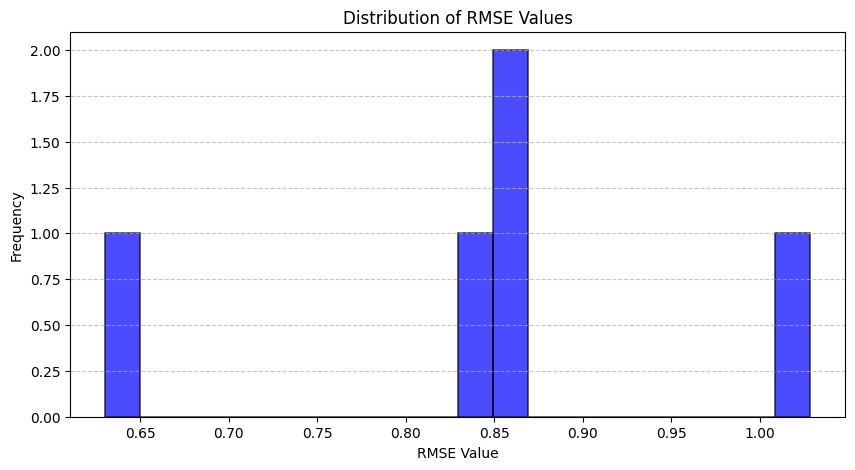

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
import matplotlib.pyplot as plt

# Load the book dataset and user dataset into DataFrames
books_df = pd.read_csv("books.csv", encoding='latin-1')
users_df = pd.read_csv("users.csv", encoding='latin-1')

users_df = users_df.drop_duplicates(subset='User-ID')

# Create the user-item matrix
user_item_matrix = users_df.pivot(index='User-ID', columns='Genres', values='Ratings').fillna(0)
user_item_matrix_sparse = csr_matrix(user_item_matrix.values)

# Apply matrix factorization using SVD
svd = TruncatedSVD(n_components=6)  # Change n_components to 6
user_factors = svd.fit_transform(user_item_matrix_sparse)
item_factors = svd.components_.T

# Prepare data for Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(users_df[['User-ID', 'Genres', 'Ratings']], reader)

# Define the SVD model
model = SVD(n_factors=6)  # Match the number of factors with TruncatedSVD

# Fit the model on the entire dataset
trainset = data.build_full_trainset()
model.fit(trainset)

# Function to get book recommendations for a user
def get_recommendations(user_id, num_recommendations=10):
    # Get a list of all book IDs
    book_ids = list(books_df['ISBN'])

    # Create a list of tuples (book ID, estimated rating) for the user
    user_ratings = [(book_id, model.predict(uid=user_id, iid=book_id).est) for book_id in book_ids]

    # Sort the list by estimated rating in descending order
    user_ratings.sort(key=lambda x: x[1], reverse=True)

    # Get the top N recommendations
    top_recommendations = user_ratings[:num_recommendations]

    return top_recommendations

# Example: Get recommendations for a specific user (replace 'user_id' with the desired user's ID)
user_id = 'kinza'
recommendations = get_recommendations(user_id, num_recommendations=10)

# Print the top recommended books
print(f"Top 10 recommended books for User {user_id}:")
for book_id, rating in recommendations:
    book_title = books_df.loc[books_df['ISBN'] == book_id, 'Book-Title'].values[0]
    print(f"- {book_title} (Estimated rating: {rating})")


# Perform cross-validation to calculate RMSE for all users
cv_results = cross_validate(model, data, cv=5, verbose=True, measures=['RMSE'])

# Calculate the collective RMSE
collective_rmse = np.mean(cv_results['test_rmse'])

print("Collective RMSE for all users:", collective_rmse)



# Extract RMSE values from cross-validation results
rmse_values = cv_results['test_rmse']

# Calculate mean and standard RMSE
mean_rmse = np.mean(rmse_values)
std_dev_rmse = np.std(rmse_values)

print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_dev_rmse)

# Create a histogram of RMSE values
plt.figure(figsize=(10, 5))
plt.hist(rmse_values, bins=20, alpha=0.7, color='b', edgecolor='black', linewidth=1.2)
plt.xlabel('RMSE Value')
plt.ylabel('Frequency')
plt.title('Distribution of RMSE Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

`The section "Evaluating RMSE of algorithm SVD on 5 split(s)" provides information about the evaluation of the SVD-based recommendation algorithm using a technique called cross-validation. Let's break down the key elements:`

`Fold 1 to Fold 5: These are the results for each fold of cross-validation. In this case, the data is split into 5 subsets, and the algorithm is tested on each subset while being trained on the remaining data. The RMSE (Root Mean Square Error) for the test set is reported for each fold. RMSE measures the prediction error of the model, with lower values indicating better accuracy.`

`Mean: This is the average RMSE across all folds. It represents the overall prediction accuracy of the SVD algorithm when applied to different subsets of the data. In this case, the mean RMSE is 0.8453.`

`Std: This is the standard deviation of the RMSE values across all folds. It provides a measure of the variability or spread in the RMSE values. A higher standard deviation suggests that the model's performance varies more widely across different data subsets. In this case, the standard deviation is 0.1266.`

`Collective RMSE for all users: This is the average RMSE considering all users and all data splits. It provides an overall assessment of the model's performance across the entire dataset. In this case, the collective RMSE is 0.8453, which is the same as the mean RMSE.`

`Mean RMSE: This is the average RMSE calculated across all users. It represents the average prediction error of the SVD model when applied to different users. In this case, it's 0.8453, which is consistent with the collective RMSE.`

`Standard Deviation of RMSE: This measures the variability of RMSE values across different users. A higher standard deviation suggests that the model's prediction accuracy varies more among users. In this case, the standard deviation is 0.1266, indicating some variability in prediction accuracy among users.`

Overall, the graph is a visual representation of the model's predictive accuracy (RMSE) across different users or data splits. The goal is to understand how consistent the model's performance is and whether it provides accurate recommendations across a range of scenarios. A more consistent and lower RMSE across users or data splits is generally desirable for a recommendation system, indicating better overall performance.

**Recommendation Technique**: Collaborative Filtering with Matrix Factorization using Singular Value Decomposition (SVD).

**Algorithm**:
- **Matrix Factorization**: The code first creates a user-item matrix where rows represent users, columns represent books, and cells contain user ratings for books. It then applies matrix factorization using SVD to factorize the user-item matrix into user and item factors.

- **Suprise Library**: The Surprise library is used to work with recommendation tasks. It loads the user ratings data into a format suitable for collaborative filtering.

- **SVD (Singular Value Decomposition)**: The SVD model is employed to learn latent factors for users and items from the user-item interaction matrix. This reduces the dimensionality of the user-item matrix and helps discover patterns and relationships between users and items.

**Results**:
- **Top 10 Recommended Books for User kinza**: The code provides personalized book recommendations for a specific user ("kinza"). It estimates ratings for all books and recommends the top-rated books to the user. The estimated ratings are provided along with the book titles.

- **RMSE Evaluation**: The code performs cross-validation to evaluate the Root Mean Square Error (RMSE) of the SVD algorithm. RMSE measures the accuracy of the predicted ratings compared to the actual ratings. A lower RMSE indicates better prediction accuracy.

- **Collective RMSE for All Users**: The collective RMSE (average RMSE across all users in the dataset) is calculated to assess the overall performance of the recommendation model. In this case, the collective RMSE is approximately 0.8453.

- **Distribution of RMSE Values**: A histogram of RMSE values across cross-validation folds is plotted to visualize the distribution of prediction errors. The mean RMSE and standard deviation of RMSE values are also calculated.

**Interpretation**:
- The code demonstrates how SVD-based matrix factorization can be used for collaborative filtering to provide personalized book recommendations.
- The RMSE evaluation indicates the model's prediction accuracy, with a lower RMSE suggesting better performance.
- The distribution of RMSE values helps assess the consistency of the model's predictions across different users and items.

In summary, this code implements collaborative filtering with SVD to provide book recommendations, evaluates the model's accuracy, and visualizes the distribution of prediction errors.